In [ ]:
%matplotlib nbagg

# FA(Firefly Algorithm)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import deepcopy
from plot import graph_plot
from plot import dots_anim_plot

## 目的関数

In [2]:
def sphere_func(x: list):
    return sum([val ** 2 for val in x])

def rastrign_func(x: list):
    return sum([val ** 2 - 10 * np.cos(2 * np.pi * val) + 10 for val in x])

## FA method

In [63]:
def fa(func, M: int=30, D: int=5, tmax: int=1000,
       fend: float=1e-5, xmin: int=-5, xmax: int=5):
    """
    @param M <int> : 粒子数
    @param D <int> : 解の次元数
    @param tmax <int> : 最大試行回数
    @param fend <float> : 終了条件
    @param xmin <int> : 初期値の最小値
    @param xmax <int> : 初期値の最大値
    遺伝的アルゴリズムのうちの差分進化の実装
    """ 

    # 初期化処理
    # FAのパラメータ
    betamin = 0.2
    alpha0 = 0.5
    alpha = 0
    L = np.fabs(xmax - xmin) / 2
    gamma = 1 / np.sqrt(L)
    # 位置
    x = (xmin - xmax) * np.random.rand(M, D) + xmax
    xnew = np.zeros((M, D))
    # 解の評価値関数
    f = np.zeros(M)
    I = np.zeros(M)
    # 目的関数の値
    xbest = np.zeros(D)
    fbest = float("inf")
    rij = float("inf")
    # その他のパラメータ
    cnt = 0
    k = 0
    # 可視化用
    xs = []
    fs = []
    
    # 関数の初期値の終了
    for i in range(M):
        f[i] = func(x[i])
        fbest = f[i] if f[i] < fbest else fbest
    
    # 実行
    # ソートをかけて光強度が低い順にすすめていく
    for t in range(tmax):
        # aの更新
        alpha = alpha0 * ((10e-4 / 0.9) ** ((t + 1) / tmax))
        e = (np.random.rand() - 0.5) * L
        xnew = deepcopy(x)
        for i in range(M):
            f[i] = func(x[i])
            I[i] = 1 / f[i]
            
        for i in range(M):
            cnt = 0
            for j in range(M):
                if I[i] < I[j]:
                    cnt += 1
                    rij = np.linalg.norm(xnew[i] - x[j])
                    beta = (1 - betamin) * np.exp(-1 * gamma * (rij ** 2)) + betamin
                    xnew[i] += beta * (x[j] - xnew[i]) + alpha * e
            if cnt == 0:
                k = i
                xnew[k] = xnew[k] + alpha * e
        # 現在の最適解よりもいい解なら
        if f[k] < fbest:
            fbest = f[k]
            xbest = x[k]
        # 可視化用にパラメータを保持
        xs.append(xbest)
        fs.append(fbest)
        # 終了条件を満たしていたら
        if fbest < fend:
            break
        # ホタルの位置情報を更新
        x = deepcopy(xnew)
    return t + 1, fbest, xbest, fs, xs

In [64]:
fa(sphere_func)

1
9
15


(1000,
 1.2322403970014855,
 array([-0.71398526, -0.15656844, -0.28319648,  0.58984944,  0.51945082]),
 [9.827781392691918,
  2.0923225911571106,
  2.0923225911571106,
  2.0923225911571106,
  2.0923225911571106,
  2.0923225911571106,
  2.0923225911571106,
  2.0923225911571106,
  2.0923225911571106,
  1.2399298839756558,
  1.2399298839756558,
  1.2399298839756558,
  1.2399298839756558,
  1.2399298839756558,
  1.2399298839756558,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.2322403970014855,
  1.23224039700148

6
8
27
28
59
60
126
150
225


IndexError: invalid index to scalar variable.

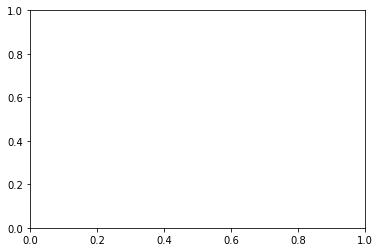

In [65]:
t, f, x, fs, xs = fa(sphere_func)
dots_anim_plot(xs)
graph_plot(t, fs)

In [ ]:
de(rastrign_func)